# Simple Linear Regression

## Importing the libraries

In [235]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [236]:
data = pd.read_csv('insurance.csv')
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [237]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1333 non-null   object 
 2   bmi       1323 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# 1-Handling missing data

In [238]:
# get the number of missing data points per column
missing_values_count = data.isnull().sum()

# look at the # of missing points 
missing_values_count

age          0
sex          5
bmi         15
children     0
smoker       0
region       0
charges      0
dtype: int64

In [239]:
# replace all the null value in numerical columns with the average and for categorcial columns with mode
data_clean = data.copy()
data_clean.sex = data.sex.fillna(data.sex.mode()[0])
data_clean.bmi = data.bmi.fillna(data.bmi.mean())
data_clean.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [240]:
data_clean.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# 2-Encoding Categorical Data

In [241]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
y = data_clean.iloc[:, -1].values
data_clean.drop("charges",axis=1,inplace = True)
X = data_clean.iloc[:, 0:].values
X.shape

(1338, 6)

In [242]:
X[0]

array([19, 'female', 27.9, 0, 'yes', 'southwest'], dtype=object)

In [243]:
print(X.shape)

(1338, 6)


In [244]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,4,5])], remainder='passthrough')
X =ct.fit_transform(X)

In [245]:
X 

array([[1.0, 0.0, 0.0, ..., 19, 27.9, 0],
       [0.0, 1.0, 1.0, ..., 18, 33.77, 1],
       [0.0, 1.0, 1.0, ..., 28, 33.0, 3],
       ...,
       [1.0, 0.0, 1.0, ..., 18, 36.85, 0],
       [1.0, 0.0, 1.0, ..., 21, 30.653960695389248, 0],
       [1.0, 0.0, 0.0, ..., 61, 29.07, 0]], dtype=object)

In [246]:
X = data_clean[['bmi']]

In [247]:
print(X.shape)
print(y.shape)

(1338, 1)
(1338,)


# 3-Feature Scaling

In [249]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scalled = scaler.transform(X)

# 4-Splitting the dataset into training and test sets

In [250]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scalled, y, test_size=0.2, random_state=0)

# 5-Simple Liner Regression

In [251]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Fit the model using lr.fit()
lr.fit(X_train, Y_train)

LinearRegression()

In [252]:
import sklearn.metrics as sm
Y_pred = lr.predict(X_train)
print("Mean absolute error train =", round(sm.mean_absolute_error(Y_train, Y_pred), 2)) 
print("Mean squared error train=", round(sm.mean_squared_error(Y_train, Y_pred), 2)) 
print("Median absolute error train=", round(sm.median_absolute_error(Y_train, Y_pred), 2)) 

Mean absolute error train = 9085.88
Mean squared error train= 138587304.64
Median absolute error train= 7653.22


In [253]:
Y_pred = lr.predict(X_test)
print("Mean absolute error test =", round(sm.mean_absolute_error(Y_test, Y_pred), 2)) 
print("Mean squared error test=", round(sm.mean_squared_error(Y_test, Y_pred), 2)) 
print("Median absolute error test=", round(sm.median_absolute_error(Y_test, Y_pred), 2)) 

Mean absolute error test = 9272.7
Mean squared error test= 150013097.16
Median absolute error test= 7022.38


## Predicting the Test set results

In [254]:
y_pred = lr.predict(X_test)

## Visualising the Training set results

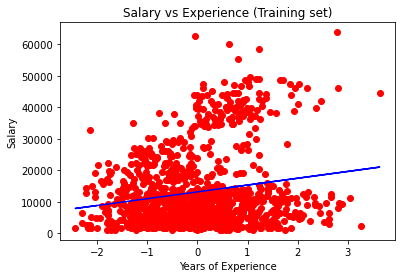

In [255]:
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, lr.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Visualising the Test set results

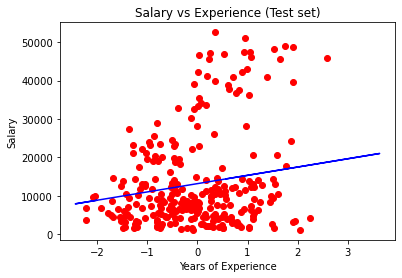

In [256]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_train, lr.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()